In [1]:
 # Load packages
from igraph import *
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipynb.fs.full.GF import degree_distribution, S

#import the functions
from ipynb.fs.full.SIR_DMP import SIR_DMP
from ipynb.fs.full.SIR_EXDMP import SIR_EXDMP,calculate_gamma_exponential
from ipynb.fs.full.SIR_PODMP import SIR_PODMP,calculate_gamma_power
from ipynb.fs.full.SIR_RADMP import SIR_RADMP,calculate_gamma_random
from ipynb.fs.full.SIR_SIGDMP import SIR_SIGDMP,calculate_gamma_sigmoidal

from ipynb.fs.full.SIR_MC import SIR_MC
from ipynb.fs.full.SIR_EXMC import SIR_EXMC, calculate_gamma_exponential
from ipynb.fs.full.SIR_POWMC import SIR_POWMC, calculate_gamma_power
from ipynb.fs.full.SIR_RAMC import SIR_RAMC, calculate_gamma_random
from ipynb.fs.full.SIR_SIGMC import SIR_SIGMC, calculate_gamma_sigmoidal

from ipynb.fs.full.SIR_ENSEMBLE import SIR_master_equation
from ipynb.fs.full.SIR_EXENSEMBLE import SIR_EXENSEMBLE,calculate_gamma_exponential
from ipynb.fs.full.SIR_RAENSEMBLE import SIR_RAENSEMBLE, calculate_gamma_random
from ipynb.fs.full.SIR_POENSEMBLE import SIR_POENSEMBLE, calculate_gamma_power
from ipynb.fs.full.SIR_SIGENSEMBLE import SIR_SIGENSEMBLE, calculate_gamma_sigmoidal

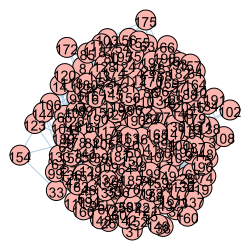

In [2]:
# Create a tree network using igraph method
G = Graph.Erdos_Renyi(n = 200, p = 0.05, directed = False)

G.vs["name"] = [str(i) for i in range(len(G.vs))]

#transforming to dataframe
g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                  'target': [x for e in G.es for x in (e.target, e.source)]})
#plotting
p_style = {"bbox": (250, 250), "vertex_color": "#FBB4AE", "edge_color": "#B3CDE3"}
plot(G, layout=G.layout("kk"), vertex_label=G.vs["name"], **p_style)

In [3]:
# Parameters
# Transmission rate
beta = 0.5
# Recovery rate
gamma = 1
#Time 
T = 10
#Initial probability for infected node
p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
p0.loc[p0['node'].isin([1]), 'prob'] = 0.6

In [37]:
pk = degree_distribution(G)
mean_size = S(beta, pk)

DMP_final_outbreak_size = []
ENSEMBLE_final_outbreak_size = []
MC_final_outbreak_size = []

mrg_sDMP, mrg_iDMP,mrg_rDMP,_,_ = SIR_DMP(g, p0, beta, gamma, T)
mrg_sRADMP, mrg_iRADMP,mrg_rRADMP,_,_ = SIR_RADMP(g, p0, beta, T)
mrg_sPODMP, mrg_iPODMP,mrg_rPODMP,_,_ = SIR_PODMP(g, p0, beta, T)
mrg_sEXDMP, mrg_iEXDMP,mrg_rEXDMP,_,_ = SIR_EXDMP(g, p0, beta, T)
mrg_sSIGDMP, mrg_iSIGDMP,mrg_rSIGDMP,_,_ = SIR_SIGDMP(g, p0, beta, T)

mrg_sENSEMBLE, mrg_iENSEMBLE, mrg_rENSEMBLE = SIR_master_equation(g, p0, beta, gamma, T)
mrg_sEXENSEMBLE, mrg_iEXENSEMBLE, mrg_rEXENSEMBLE = SIR_EXENSEMBLE(g, p0, beta, T)
mrg_sRAENSEMBLE, mrg_iRAENSEMBLE, mrg_rRAENSEMBLE = SIR_RAENSEMBLE(g, p0, beta, T)
mrg_sPOENSEMBLE, mrg_iPOENSEMBLE, mrg_rPOENSEMBLE = SIR_POENSEMBLE(g, p0, beta, T)
mrg_sSIGENSEMBLE, mrg_iSIGENSEMBLE, mrg_rSIGENSEMBLE = SIR_SIGENSEMBLE(g, p0, beta, T)


# mrg_sMC, mrg_iMC, mrg_rMC = SIR_MC(g, p0, beta, gamma, T, 10000)
# mrg_sRAMC, mrg_iRAMC, mrg_rRAMC = SIR_RAMC(g, p0, beta, T, 10000)
# mrg_sEXMC, mrg_iEXMC, mrg_rEXMC = SIR_EXMC(g, p0, beta, T, 10000)
# mrg_sPOWMC, mrg_iPOWMC, mrg_rPOwMC = SIR_POWMC(g, p0, beta, T, 10000)
# mrg_sSIGMC, mrg_iSIGMC, mrg_rSIGMC = SIR_SIGMC(g, p0, beta, T, 10000)

GF Runtime:   0.02 seconds
GF Runtime:   0.02 seconds
GF Runtime:   0.02 seconds
GF Runtime:   0.0 seconds
DMP Runtime:   0.09 seconds
RADMP Runtime:   0.09 seconds
PODMP Runtime:   0.14 seconds
EXDMP Runtime:   0.1 seconds
SIGDMP Runtime:   0.1 seconds
Ensemble Runtime:   0.03 seconds
EXENSEMBLE Runtime:   0.09 seconds
RAENSEMBLE Runtime:   0.02 seconds
POENSEMBLE Runtime:   0.07 seconds
SIGENSEMBLE Runtime:   0.07 seconds


EXDMP Runtime:   0.05 seconds
EXENSEMBLE Runtime:   0.04 seconds
EXMC Runtime:   485.0 seconds
EXDMP Runtime:   0.07 seconds
EXENSEMBLE Runtime:   0.05 seconds
EXMC Runtime:   1033.07 seconds
EXDMP Runtime:   0.17 seconds
EXENSEMBLE Runtime:   0.11 seconds
EXMC Runtime:   2072.44 seconds
EXDMP Runtime:   0.3 seconds
EXENSEMBLE Runtime:   0.25 seconds
EXMC Runtime:   4168.05 seconds
EXDMP Runtime:   0.65 seconds
EXENSEMBLE Runtime:   0.58 seconds
EXMC Runtime:   8350.53 seconds


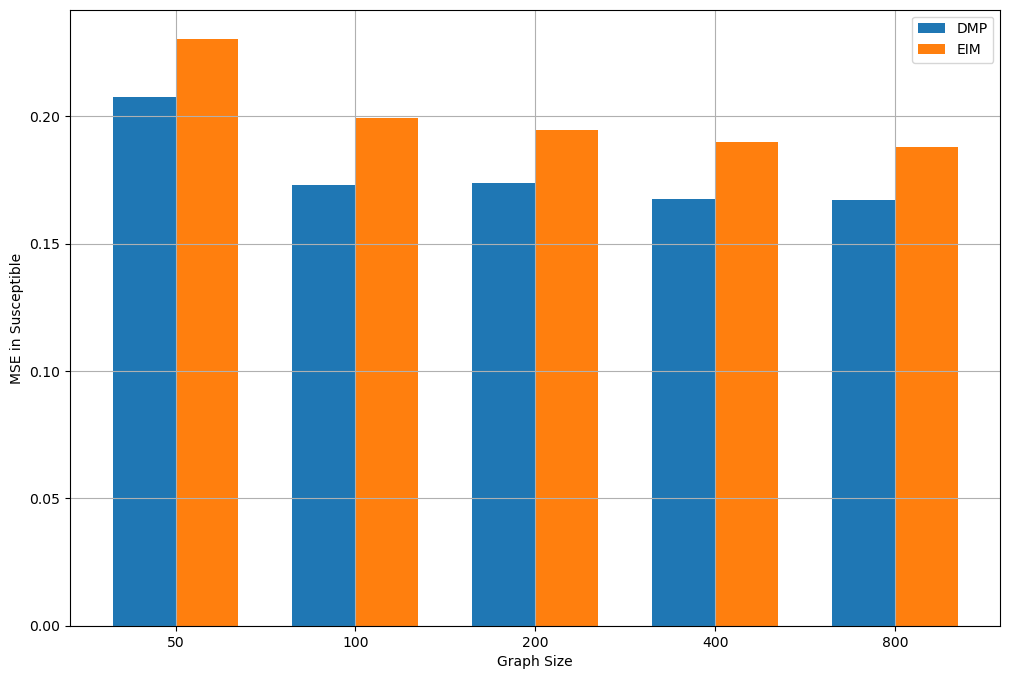

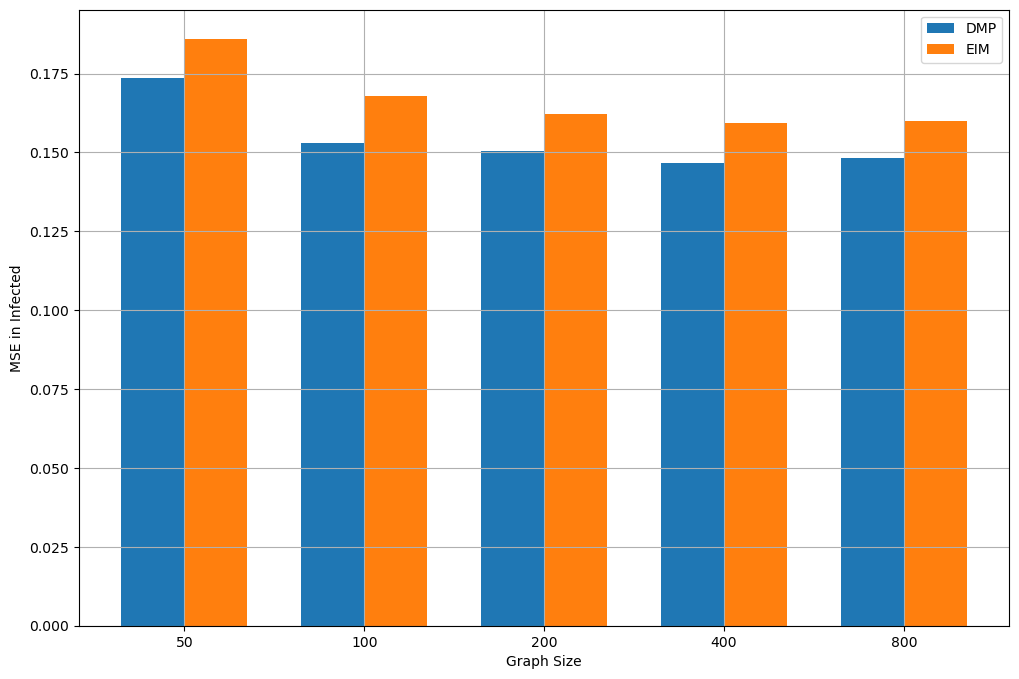

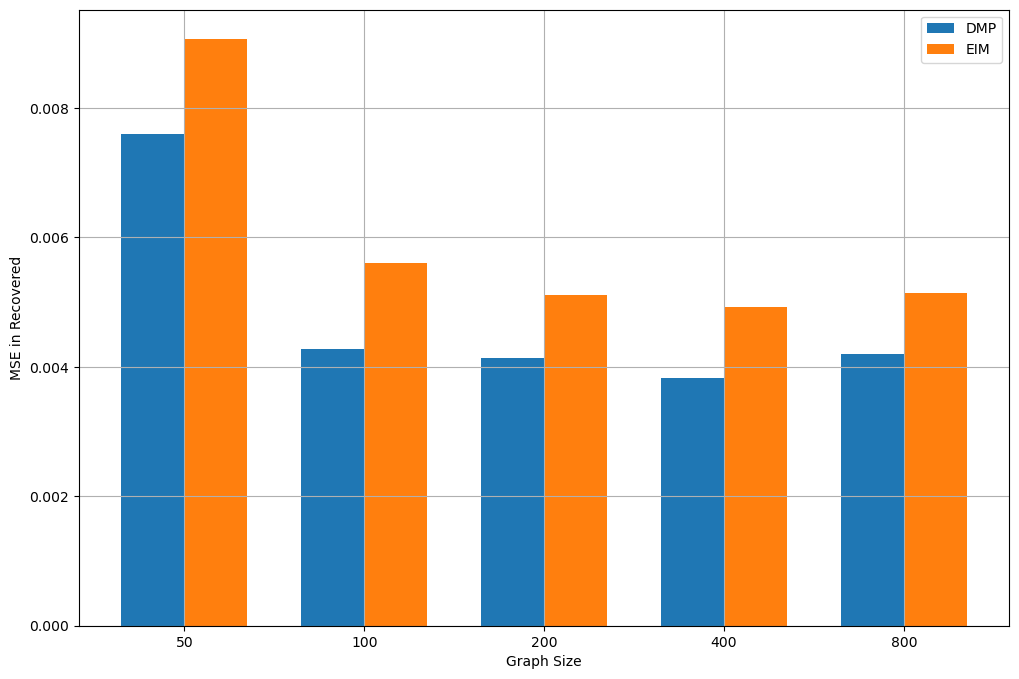

In [2]:
# Define parameters
sizes = [50, 100, 200, 400, 800]
beta = 0.3
gamma = 0.3
T = 10
num_simulations = 100000

# Store MSE results
mse_s_dmp_all = []
mse_i_dmp_all = []
mse_r_dmp_all = []
mse_s_me_all = []
mse_i_me_all = []
mse_r_me_all = []

for size in sizes:
    # Generate Barabási-Albert graph
    G = Graph.Barabasi(n=size, m=3, directed=False)
    G.vs["name"] = [str(i) for i in range(len(G.vs))]
    
    # Transform to DataFrame
    g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                      'target': [x for e in G.es for x in (e.target, e.source)]})

    # Create p0 for the current graph
    p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
    p0.loc[p0['node'].isin([1]), 'prob'] = 0.4
    
    # Run all models
    mrg_s_dmp, mrg_i_dmp, mrg_r_dmp, _,_ = SIR_EXDMP(g, p0, beta, T)
    mrg_s_me, mrg_i_me, mrg_r_me = SIR_EXENSEMBLE(g, p0, beta, T)
    mrg_s_mc, mrg_i_mc, mrg_r_mc = SIR_EXMC(g, p0, beta, T, num_simulations)

    # Compute MSE against Monte Carlo results
    mse_s_dmp = np.mean((mrg_s_dmp - mrg_s_mc) ** 2)
    mse_i_dmp = np.mean((mrg_i_dmp - mrg_i_mc) ** 2)
    mse_r_dmp = np.mean((mrg_r_dmp - mrg_r_mc) ** 2)

    mse_s_me = np.mean((mrg_s_me - mrg_s_mc) ** 2)
    mse_i_me = np.mean((mrg_i_me - mrg_i_mc) ** 2)
    mse_r_me = np.mean((mrg_r_me - mrg_r_mc) ** 2)

    mse_s_dmp_all.append(mse_s_dmp)
    mse_i_dmp_all.append(mse_i_dmp)
    mse_r_dmp_all.append(mse_r_dmp)
    mse_s_me_all.append(mse_s_me)
    mse_i_me_all.append(mse_i_me)
    mse_r_me_all.append(mse_r_me)

# Plot the MAE for different graph sizes
x = np.arange(len(sizes))
width = 0.35

# Plot MAE in Susceptible
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_s_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_s_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Susceptible')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEsex.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MAE in Infected
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_i_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_i_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Infected')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEiex.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MAE in Recovered
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_r_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_r_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Recovered')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSErex.pdf', format='pdf',bbox_inches="tight")
plt.show()


RADMP Runtime:   0.06 seconds
RAENSEMBLE Runtime:   0.01 seconds
RAMC Runtime:   355.7 seconds
RADMP Runtime:   0.06 seconds
RAENSEMBLE Runtime:   0.02 seconds
RAMC Runtime:   732.33 seconds


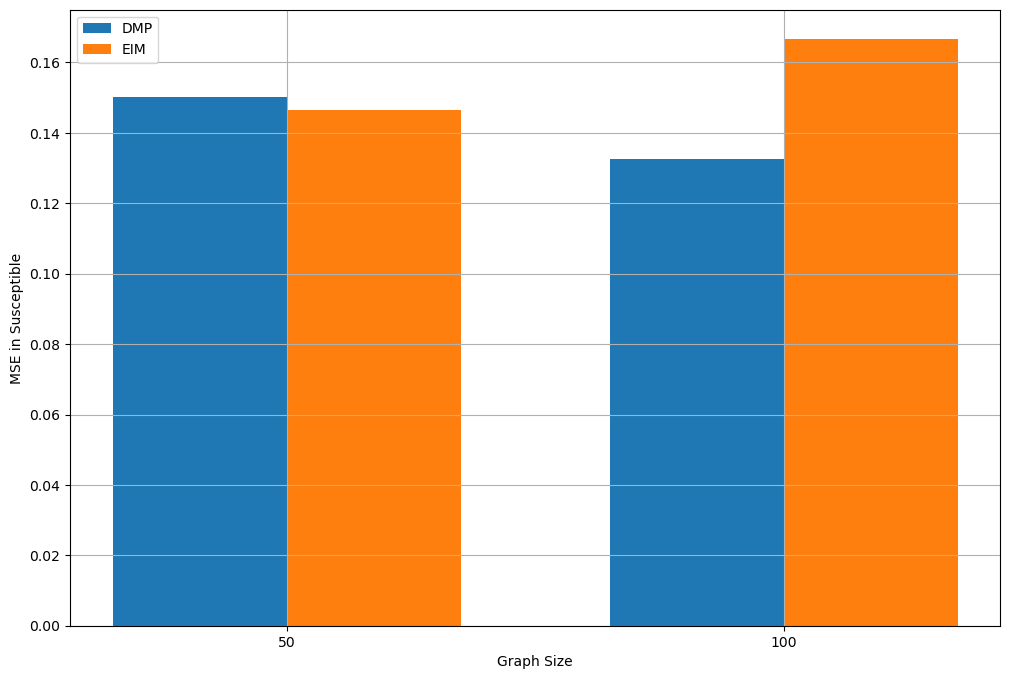

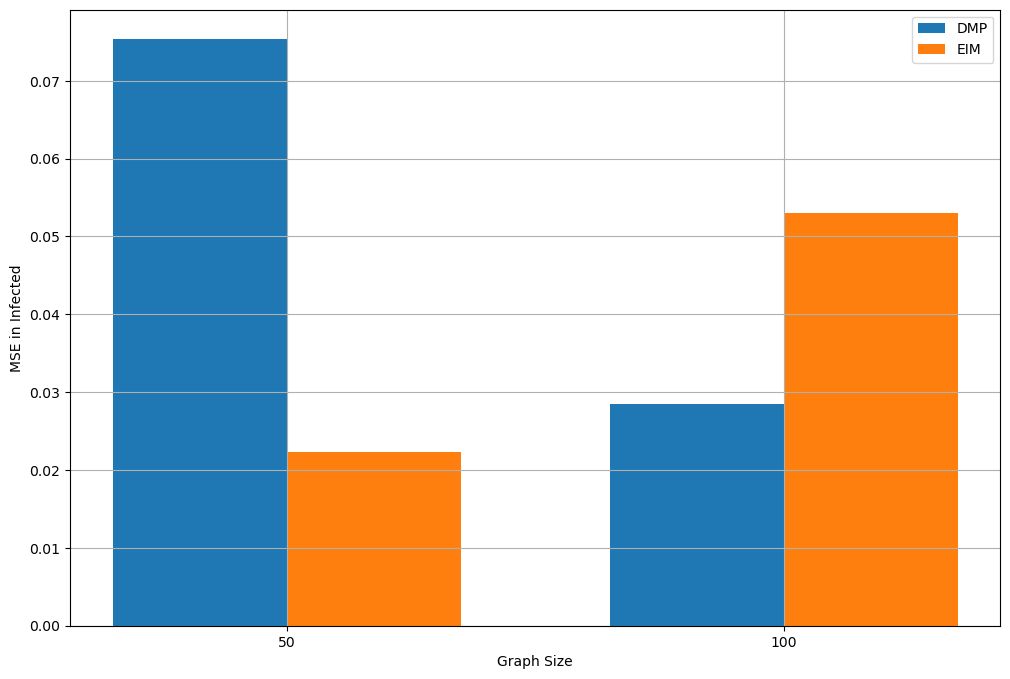

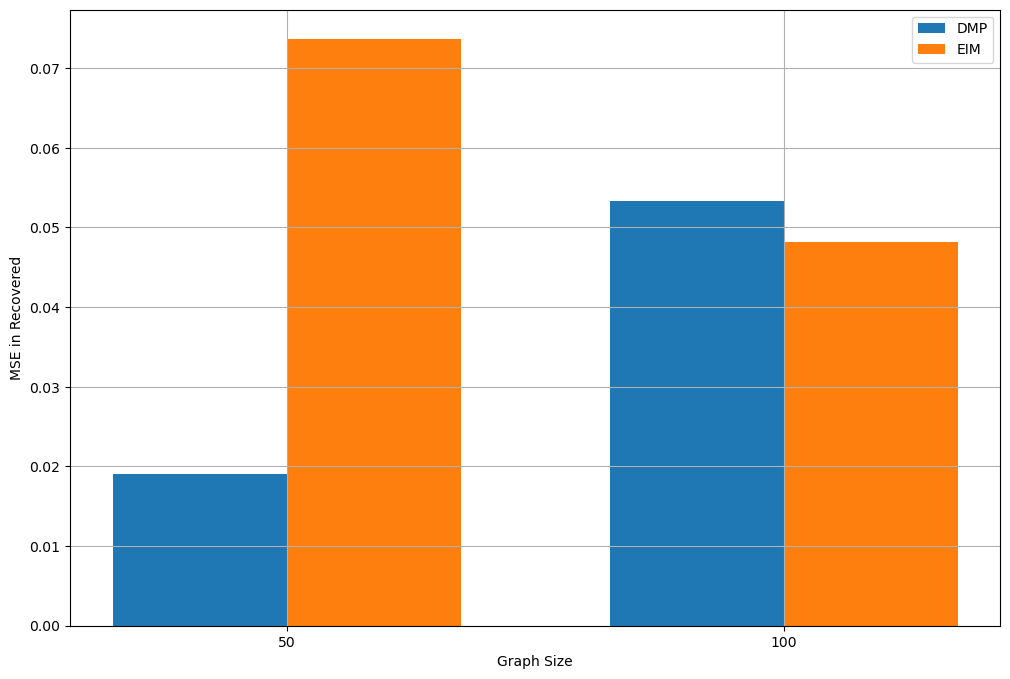

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from igraph import Graph
# Assuming SIR_RADMP, SIR_RAENSEMBLE, and SIR_RAMC are defined functions

# Define parameters
sizes = [50, 100, 200, 400, 800]
beta = 0.3
gamma = 0.3
T = 10
num_simulations = 100000

# Store MSE results
mse_s_dmp_all = []
mse_i_dmp_all = []
mse_r_dmp_all = []
mse_s_me_all = []
mse_i_me_all = []
mse_r_me_all = []

for size in sizes:
    # Generate Barabási-Albert graph
    G = Graph.Barabasi(n=size, m=3, directed=False)
    G.vs["name"] = [str(i) for i in range(len(G.vs))]
    
    # Transform to DataFrame
    g = pd.DataFrame({'source': [x for e in G.es for x in (e.source, e.target)],
                      'target': [x for e in G.es for x in (e.target, e.source)]})

    # Create p0 for the current graph
    p0 = pd.DataFrame({'node': g['source'].unique(), 'prob': 0})
    p0.loc[p0['node'].isin([1]), 'prob'] = 0.4
    
    # Run all models
    mrg_s_dmp, mrg_i_dmp, mrg_r_dmp, _,_ = SIR_RADMP(g, p0, beta, T)
    mrg_s_me, mrg_i_me, mrg_r_me = SIR_RAENSEMBLE(g, p0, beta, T)
    mrg_s_mc, mrg_i_mc, mrg_r_mc = SIR_RAMC(g, p0, beta, T, num_simulations)

    # Compute MSE against Monte Carlo results
    mse_s_dmp = np.mean((mrg_s_dmp - mrg_s_mc) ** 2)
    mse_i_dmp = np.mean((mrg_i_dmp - mrg_i_mc) ** 2)
    mse_r_dmp = np.mean((mrg_r_dmp - mrg_r_mc) ** 2)

    mse_s_me = np.mean((mrg_s_me - mrg_s_mc) ** 2)
    mse_i_me = np.mean((mrg_i_me - mrg_i_mc) ** 2)
    mse_r_me = np.mean((mrg_r_me - mrg_r_mc) ** 2)

    mse_s_dmp_all.append(mse_s_dmp)
    mse_i_dmp_all.append(mse_i_dmp)
    mse_r_dmp_all.append(mse_r_dmp)
    mse_s_me_all.append(mse_s_me)
    mse_i_me_all.append(mse_i_me)
    mse_r_me_all.append(mse_r_me)

# Plot the MSE for different graph sizes
x = np.arange(len(sizes))
width = 0.35

# Plot MSE in Susceptible
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_s_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_s_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Susceptible')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEser.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MSE in Infected
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_i_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_i_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Infected')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSEier.pdf', format='pdf',bbox_inches="tight")
plt.show()

# Plot MSE in Recovered
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, mse_r_dmp_all, width, label='DMP')
plt.bar(x + width/2, mse_r_me_all, width, label='EIM')
plt.xlabel('Graph Size')
plt.ylabel('MSE in Recovered')
plt.xticks(x, sizes)
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/MSErer.pdf', format='pdf',bbox_inches="tight")
plt.show()


GF Runtime:   0.01 seconds
GF Runtime:   0.02 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.0 seconds
GF Runtime:   0.01 seconds
GF Runtime:   0.01 seconds
GF Runtime:   0.0 seconds


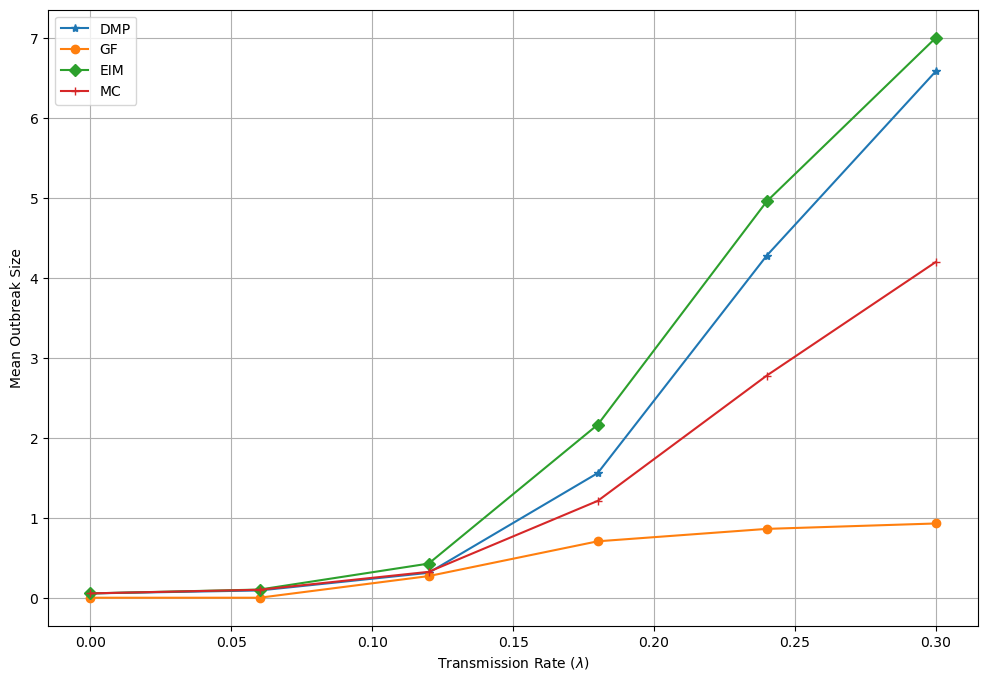

In [11]:
beta_values = np.linspace(0, 0.3, 6)
pk = degree_distribution(G)

def estimate_epidemic_probabilities(G, p0, beta_values, gamma, T):
    DMP_final_outbreak_size = []
    ENSEMBLE_final_outbreak_size = []
    MC_final_outbreak_size = []
    for beta in beta_values:
        _, _, mrg_r, _, _ = SIR_DMP(g, p0, beta, gamma, T)
        _, _, mrg_rENSEMBLE = SIR_master_equation(g, p0, beta, gamma, T)
        _, _, mrg_rMC = SIR_MC(g, p0, beta, gamma, T, 100000)
        sum_mrg_d = np.sum(mrg_r, axis=1)
        sum_mrg_e = np.sum(mrg_rENSEMBLE, axis=1)
        sum_mrg_m = np.sum(mrg_rMC, axis=1)
        DMP_final_outbreak_size.append(np.mean(sum_mrg_d)/len(sum_mrg_d))
        ENSEMBLE_final_outbreak_size.append(np.mean(sum_mrg_e)/len(sum_mrg_e))
        MC_final_outbreak_size.append(np.mean(sum_mrg_m)/len(sum_mrg_m))# Calculate and store the average probability for each beta
    return DMP_final_outbreak_size, ENSEMBLE_final_outbreak_size, MC_final_outbreak_size # Return the list directly, not inside a tuple


epidemic_probabilities, epidemic_probabilities1, epidemic_probabilities2 = estimate_epidemic_probabilities(g, p0, beta_values, gamma, T)
S_values = [S(T, pk) for T in beta_values]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(beta_values, epidemic_probabilities, label='DMP', marker = '*')
plt.plot(beta_values, S_values, label='GF', marker = 'o')
plt.plot(beta_values, epidemic_probabilities1, label='EIM', marker = 'D')
plt.plot(beta_values, epidemic_probabilities2, label='MC', marker = '+')
plt.xlabel('Transmission Rate ($\\lambda$)')
plt.ylabel('Mean Outbreak Size')
plt.legend()
plt.grid(True)
plt.savefig('C:/Users/abbau/Downloads/epidermiER.pdf', format='pdf',bbox_inches="tight")
plt.show()


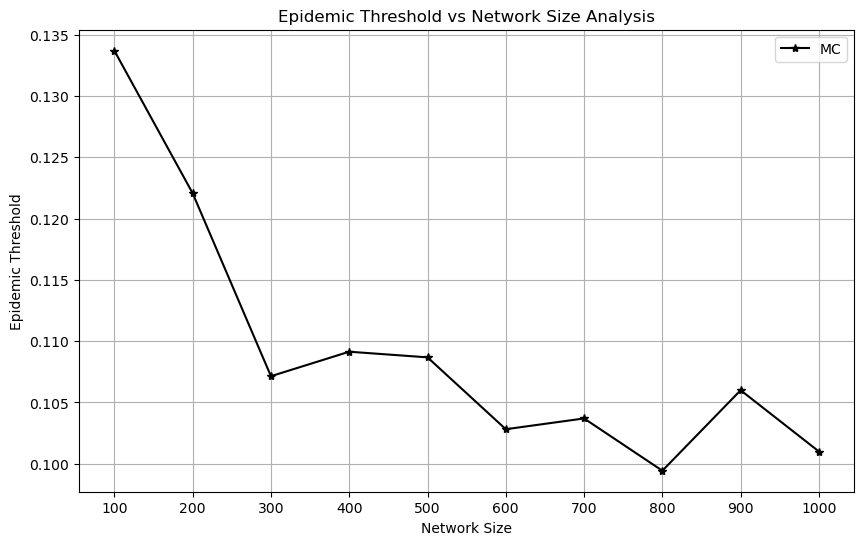

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(sizes, thresholds, label='GF', marker='o')
plt.plot(sizes, epidemic_threshold, label='MC', marker='*', linestyle='-', color='black')
#plt.plot(sizes, adjusted_listD, label='DMP', marker='+', linestyle='-.', color='green')
#plt.plot(sizes, adjusted_listE, label='EIM', marker='D', linestyle=':', color='red')
plt.title('Epidemic Threshold vs Network Size Analysis')
plt.xlabel('Network Size')
plt.ylabel('Epidemic Threshold')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(100, 1100, step=100))
plt.show()

In [36]:

def find_threshold(beta_values, probabilities):
    # Find the first beta where the change in probability starts to increase more steeply
    deltas = np.diff(probabilities)  # Compute first derivative
    threshold_index = np.argmax(deltas > np.percentile(deltas, 90))  # Find where the change is significantly higher
    return beta_values[threshold_index]

threshold_betaGF = find_threshold(beta_values, S_values)
print(f"The estimated epidemic threshold is at beta GF = {threshold_betaGF:.3f}")
threshold_betaDMP = find_threshold(beta_values, epidemic_probabilities)
print(f"The estimated epidemic threshold is at beta DMP = {threshold_betaDMP:.3f}")
threshold_betaMC = find_threshold(beta_values, epidemic_probabilities2)
print(f"The estimated epidemic threshold is at beta MC = {threshold_betaMC:.3f}")
threshold_betaEIM = find_threshold(beta_values, epidemic_probabilities1)
print(f"The estimated epidemic threshold is at beta EIM = {threshold_betaEIM:.3f}")

The estimated epidemic threshold is at beta GF = 0.000
The estimated epidemic threshold is at beta DMP = 0.075
The estimated epidemic threshold is at beta MC = 0.075
The estimated epidemic threshold is at beta EIM = 0.075


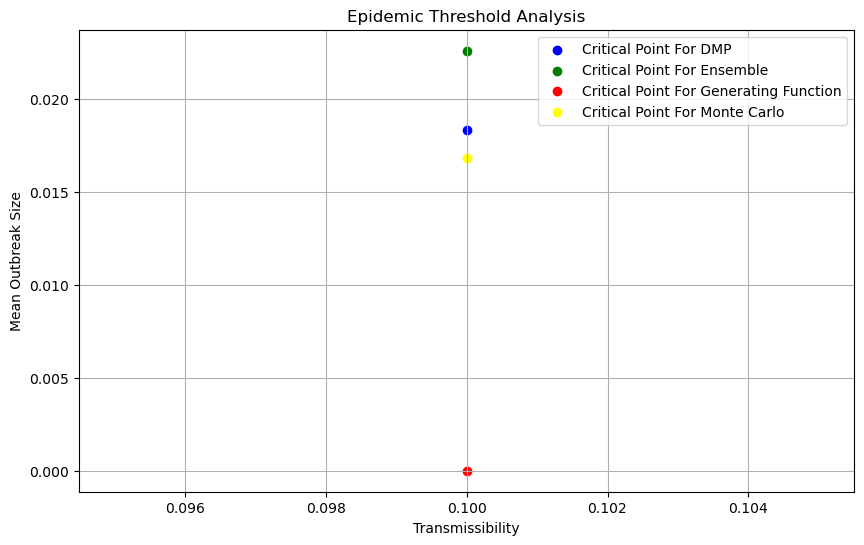

In [25]:
DMP_final_outbreak_size.append(np.mean(mrg_rDMP))
ENSEMBLE_final_outbreak_size.append(np.mean(mrg_rENSEMBLE))
MC_final_outbreak_size.append(np.mean(mrg_rMC))

# Plotting the results
plt.figure(figsize=(10, 6))
# Use scatter for single points
plt.scatter(beta, DMP_final_outbreak_size[-1], color='blue', label='Critical Point For DMP')
plt.scatter(beta, ENSEMBLE_final_outbreak_size[-1], color='green', label='Critical Point For Ensemble')
plt.scatter(beta, mean_size, color='red', label='Critical Point For Generating Function')
plt.scatter(beta, MC_final_outbreak_size[-1], color='yellow', label='Critical Point For Monte Carlo')
plt.xlabel('Transmissibility')
plt.ylabel('Mean Outbreak Size')
plt.title('Epidemic Threshold Analysis')
plt.legend()
# Adding grid for better readability
plt.grid(True)  
plt.show()

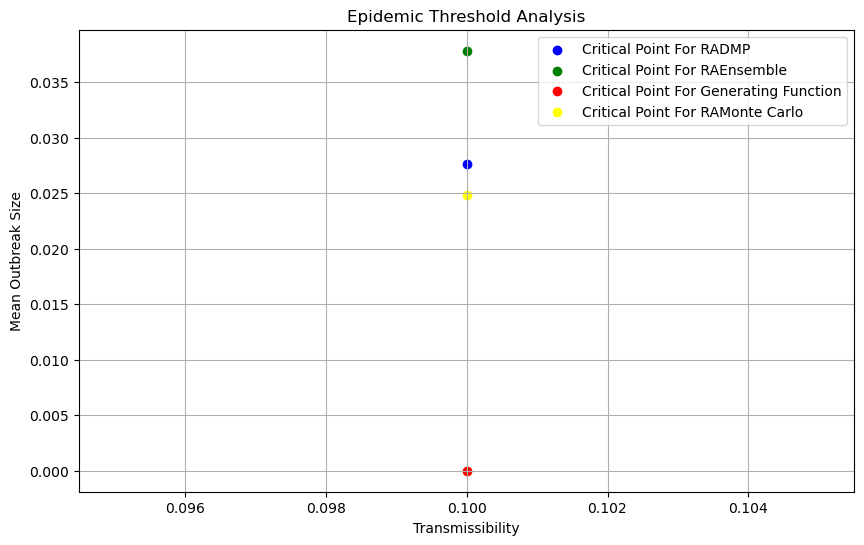

In [26]:
DMP_final_outbreak_size.append(np.mean(mrg_rRADMP))
ENSEMBLE_final_outbreak_size.append(np.mean(mrg_rRAENSEMBLE))
MC_final_outbreak_size.append(np.mean(mrg_rRAMC))

# Plotting the results
plt.figure(figsize=(10, 6))
# Use scatter for single points
plt.scatter(beta, DMP_final_outbreak_size[-1], color='blue', label='Critical Point For RADMP')
plt.scatter(beta, ENSEMBLE_final_outbreak_size[-1], color='green', label='Critical Point For RAEnsemble')
plt.scatter(beta, mean_size, color='red', label='Critical Point For Generating Function')
plt.scatter(beta, MC_final_outbreak_size[-1], color='yellow', label='Critical Point For RAMonte Carlo')
plt.xlabel('Transmissibility')
plt.ylabel('Mean Outbreak Size')
plt.title('Epidemic Threshold Analysis')
plt.legend()
# Adding grid for better readability
plt.grid(True)  
plt.show()

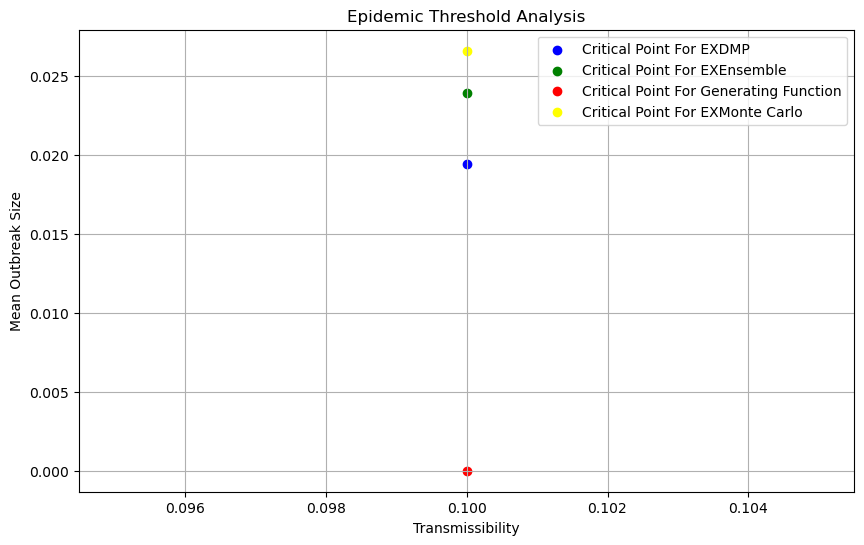

In [27]:
DMP_final_outbreak_size.append(np.mean(mrg_rEXDMP))
ENSEMBLE_final_outbreak_size.append(np.mean(mrg_rEXENSEMBLE))
MC_final_outbreak_size.append(np.mean(mrg_rEXMC))

# Plotting the results
plt.figure(figsize=(10, 6))
# Use scatter for single points
plt.scatter(beta, DMP_final_outbreak_size[-1], color='blue', label='Critical Point For EXDMP')
plt.scatter(beta, ENSEMBLE_final_outbreak_size[-1], color='green', label='Critical Point For EXEnsemble')
plt.scatter(beta, mean_size, color='red', label='Critical Point For Generating Function')
plt.scatter(beta, MC_final_outbreak_size[-1], color='yellow', label='Critical Point For EXMonte Carlo')
plt.xlabel('Transmissibility')
plt.ylabel('Mean Outbreak Size')
plt.title('Epidemic Threshold Analysis')
plt.legend()
# Adding grid for better readability
plt.grid(True)  
plt.show()

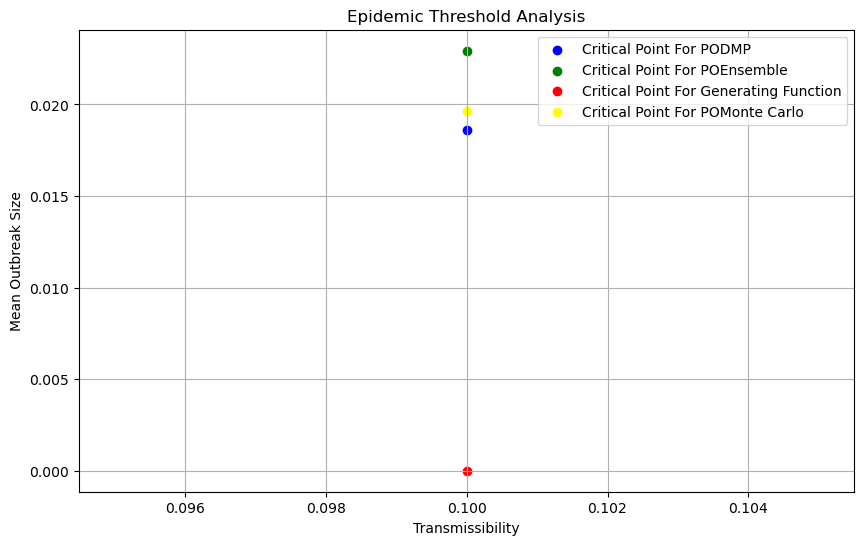

In [28]:
DMP_final_outbreak_size.append(np.mean(mrg_rPODMP))
ENSEMBLE_final_outbreak_size.append(np.mean(mrg_rPOENSEMBLE))
MC_final_outbreak_size.append(np.mean(mrg_rPOwMC))

# Plotting the results
plt.figure(figsize=(10, 6))
# Use scatter for single points
plt.scatter(beta, DMP_final_outbreak_size[-1], color='blue', label='Critical Point For PODMP')
plt.scatter(beta, ENSEMBLE_final_outbreak_size[-1], color='green', label='Critical Point For POEnsemble')
plt.scatter(beta, mean_size, color='red', label='Critical Point For Generating Function')
plt.scatter(beta, MC_final_outbreak_size[-1], color='yellow', label='Critical Point For POMonte Carlo')
plt.xlabel('Transmissibility')
plt.ylabel('Mean Outbreak Size')
plt.title('Epidemic Threshold Analysis')
plt.legend()
# Adding grid for better readability
plt.grid(True)  
plt.show()

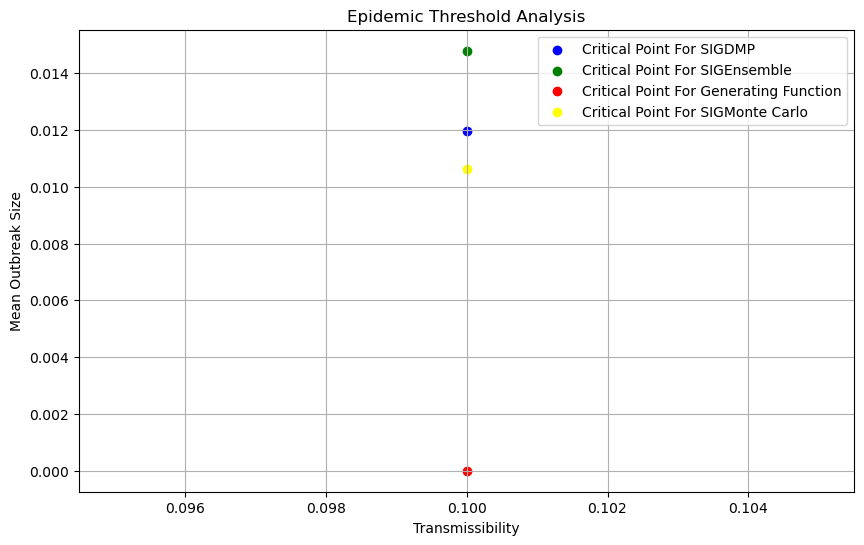

In [29]:
DMP_final_outbreak_size.append(np.mean(mrg_rSIGDMP))
ENSEMBLE_final_outbreak_size.append(np.mean(mrg_rSIGENSEMBLE))
MC_final_outbreak_size.append(np.mean(mrg_rSIGMC))

# Plotting the results
plt.figure(figsize=(10, 6))
# Use scatter for single points
plt.scatter(beta, DMP_final_outbreak_size[-1], color='blue', label='Critical Point For SIGDMP')
plt.scatter(beta, ENSEMBLE_final_outbreak_size[-1], color='green', label='Critical Point For SIGEnsemble')
plt.scatter(beta, mean_size, color='red', label='Critical Point For Generating Function')
plt.scatter(beta, MC_final_outbreak_size[-1], color='yellow', label='Critical Point For SIGMonte Carlo')
plt.xlabel('Transmissibility')
plt.ylabel('Mean Outbreak Size')
plt.title('Epidemic Threshold Analysis')
plt.legend()
# Adding grid for better readability
plt.grid(True)  
plt.show()